Applying PCA from Leo (week 7 class), using vgsales_df2 with all regional sales removed.  21 features in total, global sales as target.

Following the example from https://sebastianraschka.com/Articles/2015_pca_in_3_steps.html#:~:text=The%20eigenvectors%20and%20eigenvalues%20of,the%20eigenvalues%20determine%20their%20magnitude.

In [1]:
from sklearn.datasets import load_iris
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
#insert data source
vgsales = pd.read_excel('vgsales_v5.xlsx')

vgsales.head()

# Create dummy variables for | Genre | First_Party | Platform_Type

#dummy variables for Genre
dummy_genre = pd.get_dummies(vgsales.Genre)
dummy_genre

#dummy variables for First Party
dummy_first_party = pd.get_dummies(vgsales.First_Party)
dummy_first_party

#dummy variables for Platform Type
dummy_platform_type = pd.get_dummies(vgsales.Platform_Type)
dummy_platform_type

#Merge dummy frames into one dataset with original vgsales datframe
merged_vgsales = pd.concat([vgsales, dummy_genre, dummy_first_party, dummy_platform_type], axis='columns')

vgsales_df = pd.DataFrame(merged_vgsales)
vgsales_df2 = vgsales_df.drop(columns = ["Rank","Name", "Platform", "Publisher","Genre", "First_Party", "Platform_Type","Year_1_Sales", "Year", "Atari","SEGA", "Other","EU_Sales", "Other_Sales","Avg_Annual_Sales","NA_Sales","JP_Sales"])


In [3]:
#define X & y
X = vgsales_df2.drop(columns = "Global_Sales")
y = vgsales_df2.Global_Sales




In [4]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [5]:
#create train/val/test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.2, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)

print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)
print(X_train.shape)
print(y_train.shape)

(1598, 19)
(1598,)
(1598, 19)
(1598,)
(12783, 19)
(12783,)


In [6]:
import numpy as np
cov_mat = np.cov(X_train.T)

In [7]:
cov_mat

array([[ 0.99377404, -0.12486643, -0.08768908,  0.07348136, -0.06122536,
         0.02849537,  0.08337205, -0.03663009,  0.02312805, -0.01150979,
         0.07008501,  0.03125883, -0.12090262,  0.01459468, -0.09352411,
        -0.00509228,  0.09348172, -0.10301717, -0.09352411],
       [-0.12486643,  1.00658861, -0.14322217, -0.11714022, -0.17110597,
        -0.0932121 , -0.14560948, -0.15704739, -0.14106041, -0.11815087,
        -0.200851  , -0.10469659,  0.03940136, -0.0235284 , -0.01565776,
         0.00883936,  0.02783059, -0.00779172, -0.01565776],
       [-0.08768908, -0.14322217,  0.99123633, -0.06761186, -0.09876021,
        -0.05380085, -0.08404396, -0.09064578, -0.08141829, -0.06819519,
        -0.11592867, -0.06042955, -0.05688888, -0.02692869, -0.00782933,
         0.06398044, -0.02388806,  0.02286995, -0.00782933],
       [ 0.07348136, -0.11714022, -0.06761186,  1.00929329, -0.08077515,
        -0.04400327, -0.06873885, -0.07413843, -0.06659134, -0.05577628,
        -0.094

In [8]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-6.22636341e-02  7.03206241e-02 -2.62444313e-02 -9.19400168e-02
   1.09512538e-02 -2.72510928e-01 -2.01578897e-01 -6.54644654e-01
   4.97541367e-01 -2.25456652e-01 -8.47710834e-02 -1.54001538e-01
   2.96187602e-01  9.46578190e-02  5.41676505e-02  2.75448816e-02
   8.54681700e-02  3.86667437e-02  3.03251400e-16]
 [-1.72309645e-02  5.33035539e-03 -6.22426527e-03 -7.69351862e-02
   4.25713464e-01 -3.47829526e-02  2.65027682e-01 -1.58264756e-01
  -5.93090582e-01 -1.57440185e-01  2.13450962e-02 -9.50742323e-02
   5.61855756e-01  4.61268226e-03  9.33687230e-03  5.77017271e-02
   8.39994473e-02 -6.14279222e-02  6.94990456e-17]
 [ 5.07235823e-04  3.09511411e-04 -1.78551369e-03 -6.41379243e-02
   2.88139295e-01  2.23723572e-02 -1.86050402e-01 -3.21945681e-01
  -2.21672251e-01 -8.97966580e-02 -6.21780922e-02  2.13529766e-01
  -3.45110201e-01 -6.03373474e-02  2.42894042e-01  1.48601839e-01
  -6.24699977e-01  2.70849413e-01 -2.68961540e-16]
 [-7.04821654e-02  3.04102359e-02  3.3921

In [9]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])
    
#this would be helpful to add feature labels to the corresponding eigenvalues


Eigenvalues in descending order:
2.9937812295769666
2.325887974529779
1.4028503920068465
1.3177243457761312
1.151064954548289
1.13240625965215
1.0985244870475608
1.0881766208838886
1.0796110893671251
1.0517423219565725
1.016385957075937
0.9656377937406206
0.932163431800202
0.8057778387636763
0.5209194120436086
0.05988771178897892
0.04800637964839638
0.009887005554843092
1.946296973779759e-17


In [10]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 15.7563824 ,  27.99761767,  35.38087167,  42.3161041 ,
        48.37420194,  54.33409837,  60.11567377,  65.84278796,
        71.52482144,  77.06018055,  82.4094578 ,  87.49164557,
        92.39765652,  96.63849537,  99.38011369,  99.69530495,
        99.94796432, 100.        , 100.        ])

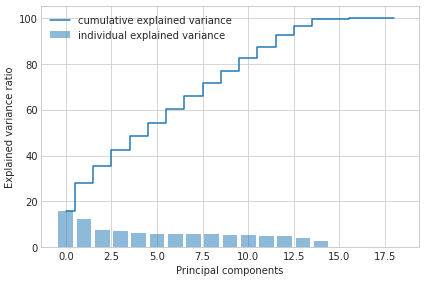

In [11]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(19), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(19), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    
#how to add feature values to x-axis

In [12]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(19,1),
                      eig_pairs[1][1].reshape(19,1)))

print('Matrix W:\n', matrix_w, matrix_w.shape)

Matrix W:
 [[-6.22636341e-02  7.03206241e-02]
 [-1.72309645e-02  5.33035539e-03]
 [ 5.07235823e-04  3.09511411e-04]
 [-7.04821654e-02  3.04102359e-02]
 [ 6.51710940e-02  1.13635519e-01]
 [ 1.15620436e-01  6.63607563e-02]
 [-6.49420210e-02  8.78712176e-05]
 [ 2.06525035e-02 -1.84594797e-02]
 [-5.89825272e-02 -1.06253651e-01]
 [ 1.04467072e-01 -5.22925679e-02]
 [-9.37990839e-02  5.12802970e-02]
 [ 5.12922032e-02 -1.99221535e-01]
 [-1.51456041e-01 -1.80705494e-02]
 [ 4.26226372e-01  3.27359174e-01]
 [ 1.88915605e-01 -6.07854327e-01]
 [-4.02102319e-01 -2.61913018e-02]
 [-5.31294729e-01  7.44326384e-02]
 [ 4.72049890e-01  2.59635122e-01]
 [ 1.88915605e-01 -6.07854327e-01]] (19, 2)


In [13]:
X_pca = X_train.dot(matrix_w)
print(X_pca.shape)

(12783, 2)


C:\Users\kyoun\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


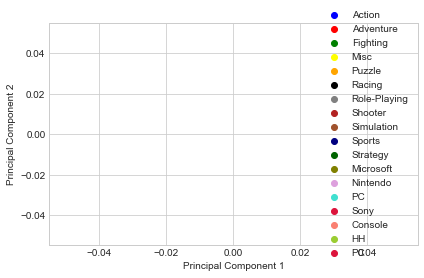

In [14]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(("Action","Adventure","Fighting", "Misc", "Puzzle","Racing", "Role-Playing","Shooter","Simulation",
                         "Sports", "Strategy","Microsoft", "Nintendo","PC", "Sony", "Console", "HH","PC"),
                        ('blue', 'red', 'green','yellow', 'orange','black','grey','firebrick','sienna','navy','darkgreen',
                        'olive', 'plum', 'turquoise', 'crimson','salmon','yellowgreen','crimson')):
        plt.scatter(X_pca[y_train==lab, 0],
                    X_pca[y_train==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='right')
    plt.tight_layout()
    plt.show()


Using PCA in sklearn based on book, pg 223

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >=0.95) + 1
d

14

AttributeError: module 'matplotlib.pyplot' has no attribute 'save_fig'

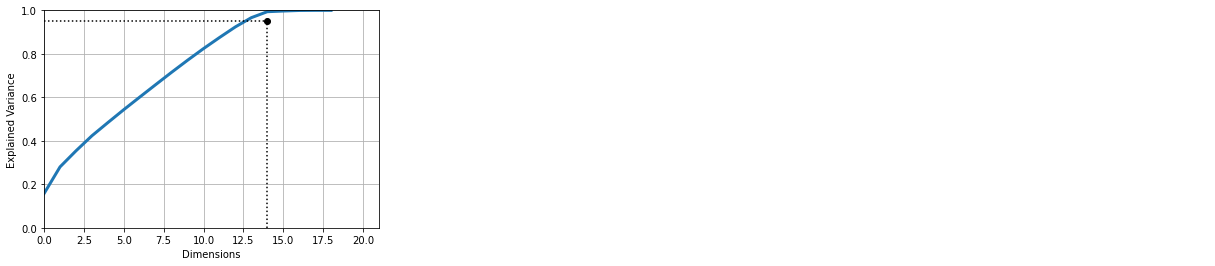

In [17]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 21, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.save_fig("explained_variance_plot")
plt.show()

In [18]:
pca = PCA(n_components = 0.95)
X_train_reduced = pca.fit_transform(X_train)
X_val_reduced = pca.fit_transform(X_val)
print(pca.n_components_)

print(np.sum(pca.explained_variance_ratio_))

14
0.9658292556860725


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats
from math import sqrt
from sklearn.metrics import r2_score
import timeit


lin_reg = LinearRegression()
lin_reg.fit(X_train_reduced,y_train)
y_pred = lin_reg.predict(X_val_reduced)
print("mse:",mean_squared_error(y_val, y_pred))
print("rmse:", sqrt(mean_squared_error(y_val, y_pred)))
print("r-squared:", r2_score(y_val, y_pred))
print("training time:", timeit.timeit())

#Using PCA that reduces features to 14 improves model slightly, but still relatively poor r-squared
#better results than KNN


mse: 2.0638762291451123
rmse: 1.4366197232201403
r-squared: -0.0016523048878092084
training time: 0.014799899999999866


In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt
from sklearn.metrics import r2_score
%matplotlib inline
import timeit

[1.9351075523207517, 1.6989073643936532, 1.5795851777886447, 1.5478470743425166, 1.5105402683735287, 1.5166094758548807, 1.5028030347495929, 1.4926750675752454, 1.502810344705161, 1.4990876622629299, 1.4925163587874857, 1.488135177668922, 1.48674294649285, 1.4910527181007394, 1.487226300338606, 1.4805802687890712, 1.479650780231252, 1.4751284792545858, 1.4681966761514933, 1.4716417314668484, 1.468296619828951, 1.4703550013409161, 1.4749359022144803, 1.4779283941928039, 1.4748611368587452, 1.473389208565779, 1.4722864255832326, 1.4697493033961926, 1.470407277586461, 1.467789287051593, 1.4673113439325185, 1.463756136087325, 1.4620226276303838, 1.4592641037433667, 1.4591183615602688, 1.4593083600929653, 1.4619223214019377, 1.4584861390265909, 1.460056032185073, 1.4617459396609056, 1.4616711880449396, 1.4589386017272228, 1.4590793667916366, 1.4580887809473098, 1.456051589083141, 1.4554636348111925, 1.456507462839261, 1.455790069158248, 1.454348873971435, 1.4546129928433493]


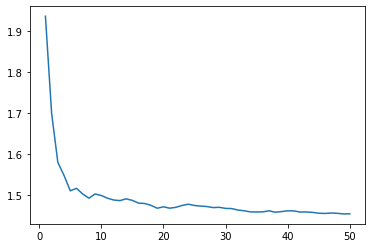

In [21]:
#Find optimal KNN

error = []
for k in range(1,51):
    knn_optimal = KNeighborsRegressor(n_neighbors = k)
    knn_optimal.fit(X_train_reduced,y_train)
    y_pred_optimal = knn_optimal.predict(X_val_reduced) 
    error.append(sqrt(mean_squared_error(y_val, y_pred_optimal)))

print(error)

plt.plot(range(1,51), error)


In [22]:
knn = KNeighborsRegressor(n_neighbors = 21)
knn.fit(X_train_reduced,y_train)


y_pred = knn.predict(X_val_reduced)
print("mse:",mean_squared_error(y_val, y_pred))
print("rmse:", sqrt(mean_squared_error(y_val, y_pred)))
print("r-squared:", r2_score(y_val, y_pred))


mse: 2.1558949638011233
rmse: 1.468296619828951
r-squared: -0.046311367461165265


In [23]:
from sklearn.ensemble import RandomForestRegressor

rf4 = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
rf4.fit(X_train_reduced, y_train)

y_pred_rf4 = rf4.predict(X_val_reduced)
print("mse:",mean_squared_error(y_val, y_pred_rf4))
print("rmse:", sqrt(mean_squared_error(y_val, y_pred_rf4)))
print("r-squared:", r2_score(y_val, y_pred_rf4))


mse: 2.62345868301971
rmse: 1.6197094440113973
r-squared: -0.27323208606995775
